In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Load the dataset

In [4]:
data = pd.read_csv('weight-height.csv')

# Initial data overview

In [7]:
print("Data Overview:")
print(data.info())
print("\nFirst few rows:\n", data.head())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB
None

First few rows:
   Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


# Check for missing values

In [10]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Gender    0
Height    0
Weight    0
dtype: int64


# Descriptive statistics

In [13]:
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
              Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699


# Exploratory Data Analysis (EDA)
# Distribution of Weight and Height

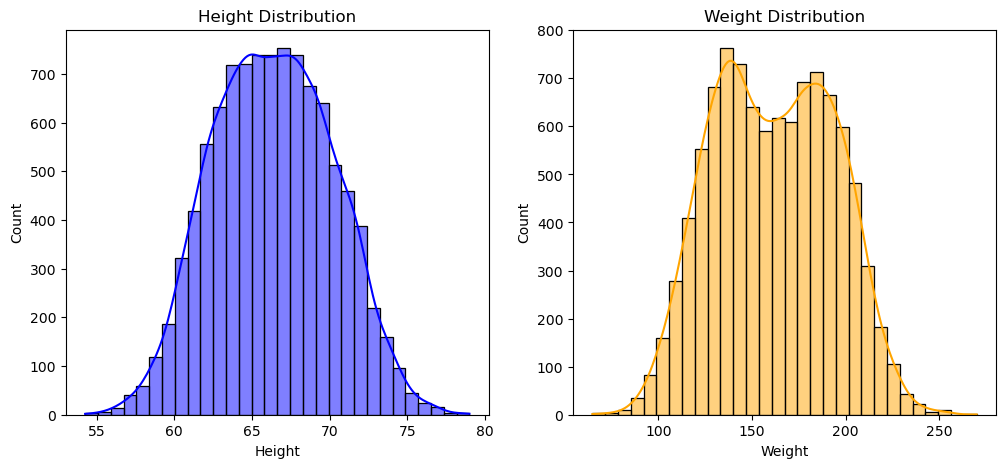

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Height'], bins=30, kde=True, color='blue')
plt.title('Height Distribution')
plt.subplot(1, 2, 2)
sns.histplot(data['Weight'], bins=30, kde=True, color='orange')
plt.title('Weight Distribution')
plt.show()

# Boxplot to check for outliers

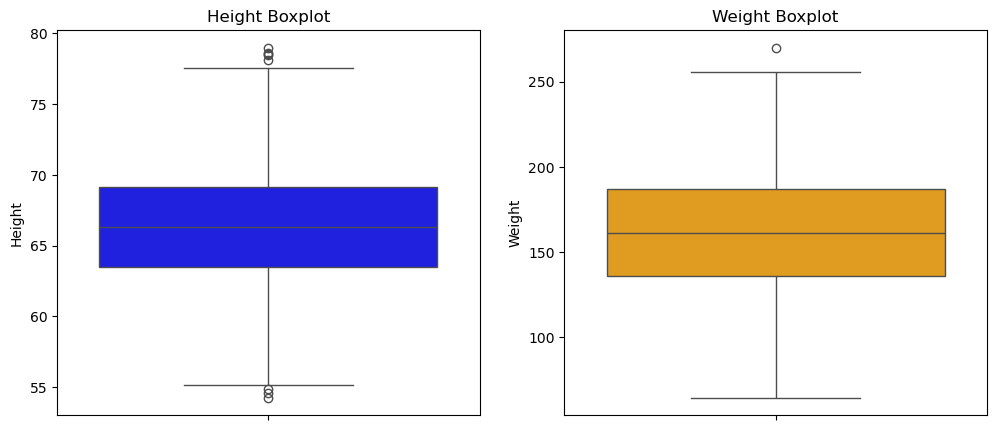

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data['Height'], color='blue')
plt.title('Height Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(data['Weight'], color='orange')
plt.title('Weight Boxplot')
plt.show()

# Scatter plot of Height vs Weight colored by Gender

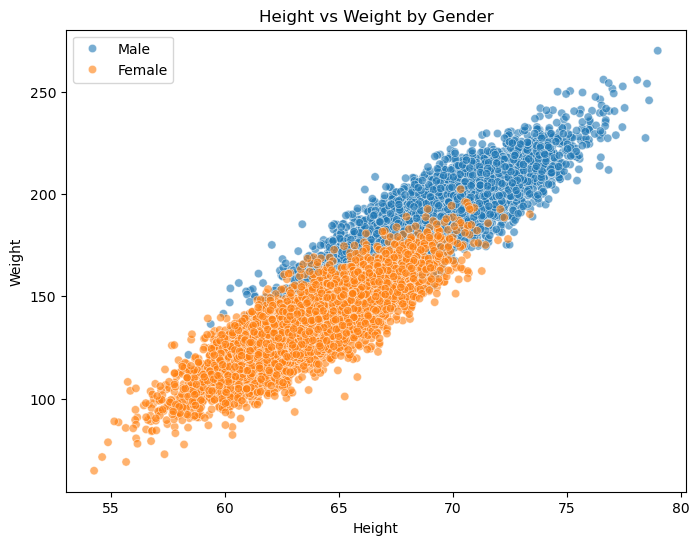

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=data, alpha=0.6)
plt.title('Height vs Weight by Gender')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

# Encode Gender as a numerical feature

In [29]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split data into features and target

In [32]:
X = data[['Height', 'Gender']]
y = data['Weight']

# Split into training and testing sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predictions and evaluation

In [41]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [43]:
print(f"Model Evaluation:\nRMSE: {rmse:.2f}\nR^2 Score: {r2:.2f}")

Model Evaluation:
RMSE: 10.06
R^2 Score: 0.90


# Coefficients Interpretation

In [53]:
print("\nModel Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Model Coefficients:
  Feature  Coefficient
0  Height     5.973141
1  Gender    19.347203


# Residual plot

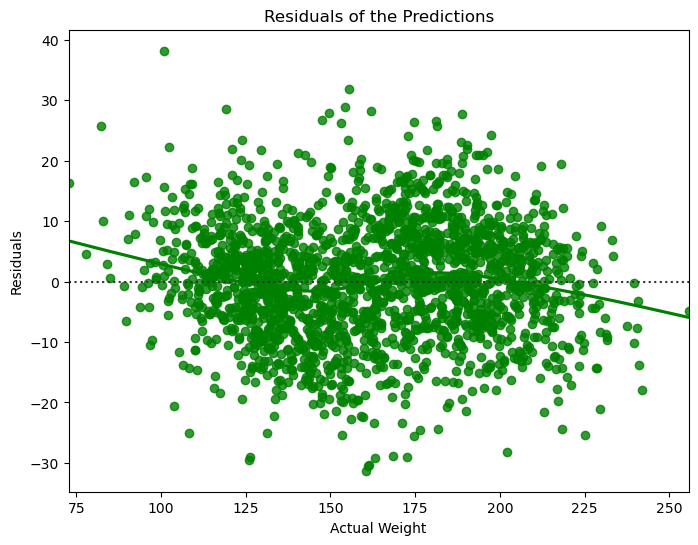

In [55]:
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color="g")
plt.title('Residuals of the Predictions')
plt.xlabel('Actual Weight')
plt.ylabel('Residuals')
plt.show()

# Prediction vs Actual plot

C:\Users\pc\AppData\Local\Temp\ipykernel_13720\469537259.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


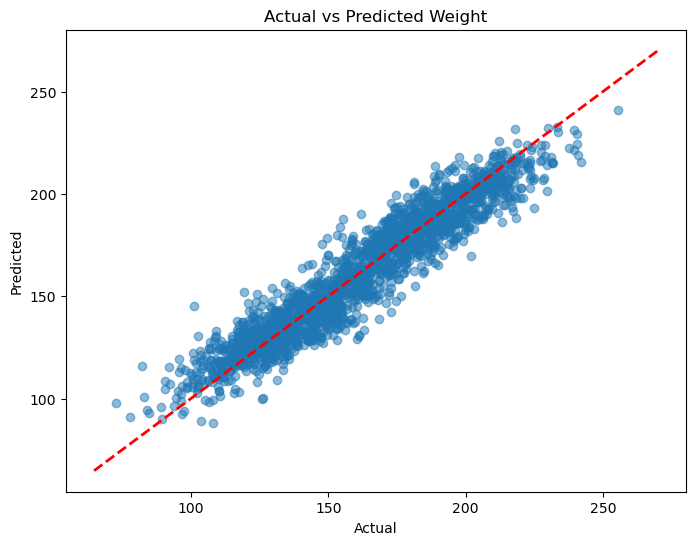

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Weight')
plt.show()
import war

# Insights

In [61]:
print("\nInsights:")
print("1. The model shows a linear relationship between height and weight with a moderate R^2 score, which indicates that height is a significant predictor of weight.")
print("2. Gender plays a role in the weight distribution, as seen in the scatter plot.")
print("3. The residual plot shows some spread but no major patterns, suggesting a reasonable fit.")


Insights:
1. The model shows a linear relationship between height and weight with a moderate R^2 score, which indicates that height is a significant predictor of weight.
2. Gender plays a role in the weight distribution, as seen in the scatter plot.
3. The residual plot shows some spread but no major patterns, suggesting a reasonable fit.
